In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("HousingData.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
df.isnull().sum() # boş değer var mı?

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [5]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [6]:
df["CRIM"] = df["CRIM"].fillna(df["CRIM"].mean())

In [8]:
df=df.fillna(df.mean()) #Bütün boş alanları o alanın ortalaması ile doldurur.
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
!pip install scikit-learn


In [11]:
# Etiket ile diğer verileri ayır.

In [17]:
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [13]:
X = df.drop(columns=["MEDV"])
y = df["MEDV"]
# Etiket ile diğer verileri ayır.

In [18]:
X.shape

(506, 13)

In [19]:
# Train -> Test 200 test
# 306 eğitim
# 200 test

# 306 tanesini inceler inceleme sonucu ne kadar başarılı oldugunu 200 üzerinde test eder.

#Train-Test-Split
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Random Seed-State -> Rastgeleliğin sabit kalmasını sağlar.

In [40]:
X_train.shape, X_test.shape

((354, 13), (152, 13))

In [41]:
## Linear Regression
from sklearn.linear_model import LinearRegression

In [42]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [47]:
y_pred = model.predict(X_test)

In [48]:
# MAE -> Mean Absolute Error

mae = mean_absolute_error(y_test,y_pred)
mae

3.1410525671084324

In [49]:
# MSE => Mean Squared error
# Daha büyük yanlışları daha fazla cezalandırır.
mse = mean_squared_error(y_test, y_pred)
mse

21.818457953525854

In [51]:
# gerçek değer 10 -> 
# tahmin 5 -> yanlışlık payı 5 birim  -> 25 birim
# tahmin 25 -> yanlışlık payı 15 birim -> 225 birim
# 10 birim fark

In [52]:
import matplotlib.pyplot as plot

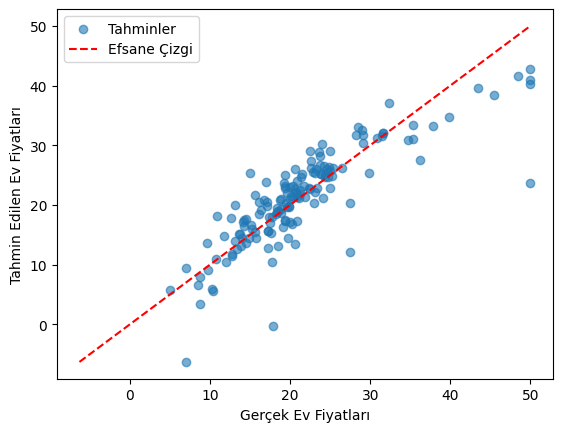

In [61]:
plot.scatter(y_test, y_pred, label="Tahminler", alpha=0.6)
plot.xlabel("Gerçek Ev Fiyatları")
plot.ylabel("Tahmin Edilen Ev Fiyatları")

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(),y_pred.max())

plot.plot([min_val,max_val], [min_val,max_val], color="red", linestyle="--",label="Efsane Çizgi")
plot.legend()
plot.show()